In [1]:
import os
import tarfile
from six.moves import urllib


In [2]:
download_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = "datasets/housing"
housing_url = download_path+housing_path+ "/housing.tgz"

Reference =  Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron

In [3]:
# def fetch_housing_data(housing_url = Housing_url, housing_path = Housing_path ):
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     hosing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path = housing_path)
#     housing_tgz.close()

In [4]:
import pandas as pd

def load_housing_data():
    csv_path = os.path.join(download_path +housing_path, "/housing.csv")
    return pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Only total bedrooms have null values of 207

In [8]:
housing.shape

(20640, 10)

In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


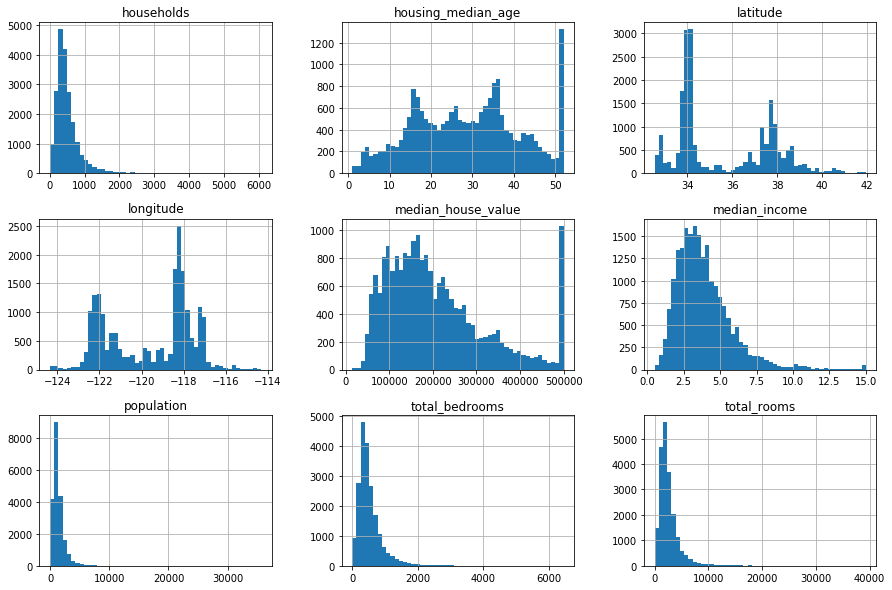

In [11]:
% matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (15,10))
plt.show()

Notice things on histogram -
1. Median income does not expressed in US dollors
2. Data has been scaled and capped at 15(actually 15.0001) for higher median incomes
3. The hosuing median age and the median house values are also capped
4. Many hsitograms are tail heavy: they extend to much farther to the right of the median than to the left.

## Create a test set

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [13]:
train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set), "train +",len(test_set), "test")

16512 train + 4128 test


In [14]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index()
train_set_set,test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [16]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set,test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Or you can use train_test_split fuction from sckit-learn library which does the pretty same
you can use - 


from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [17]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace = True)

The above code creates income category attribute by dividing the median income by 1.5
(to limit the number of income categories) and rounding up using ceil (to have discrete categories)
and then merging all the categories greater than 5 into category 5

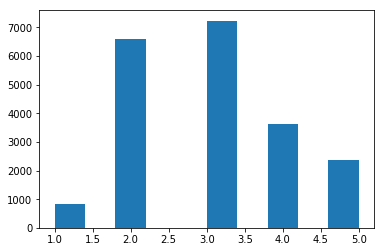

In [18]:
plt.hist(housing["income_cat"])
plt.show()

In [19]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

Now we ready to do stratified sampling based on income category

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
strat_train_set["income_cat"].value_counts()

3.0    5789
2.0    5265
4.0    2911
5.0    1889
1.0     658
Name: income_cat, dtype: int64

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis =1, inplace = True)

We often neglected to test set generation but it is a critical part of machine learning project

## Discover and Visualize The Data to Gain Insights

In [23]:
# First create a copy of data so we can play with data without harming the original data
housing = strat_train_set.copy()

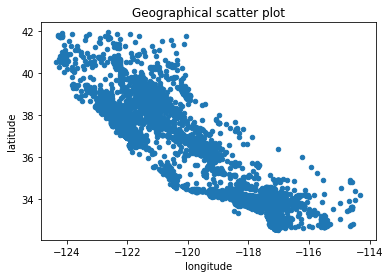

In [24]:
#Visualizing Geographical Data
housing.plot(kind = "scatter", x = "longitude", y = "latitude", title = "Geographical scatter plot")

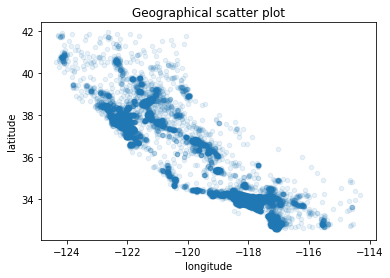

In [25]:
# setting the alpha parameter or option makes it much easier to visualize the places where there is a high density of data points

housing.plot(kind = "scatter", x = "longitude", y = "latitude",alpha = 0.1, title = "Geographical scatter plot")

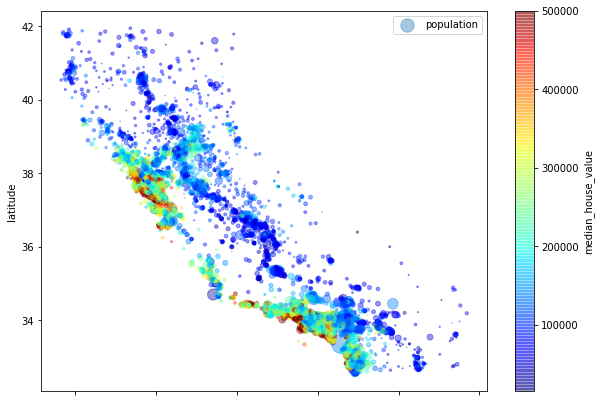

In [26]:
# The radius of each circles represents the district's population (option s) and the color represents the price (option c)
# we will use a predefined color map (option cmap) called jet which ranges from blue to red

housing.plot(kind = "scatter", x= "longitude", y = "latitude", alpha = 0.4, 
             s = housing["population"]/100, label = "population", figsize = (10,7), 
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True )

In [27]:
# Looking for correlations
corr_matrix = housing.corr()
# Now check each attribute correlates with the median house value:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245CCBC3240>,
      dtype=object)

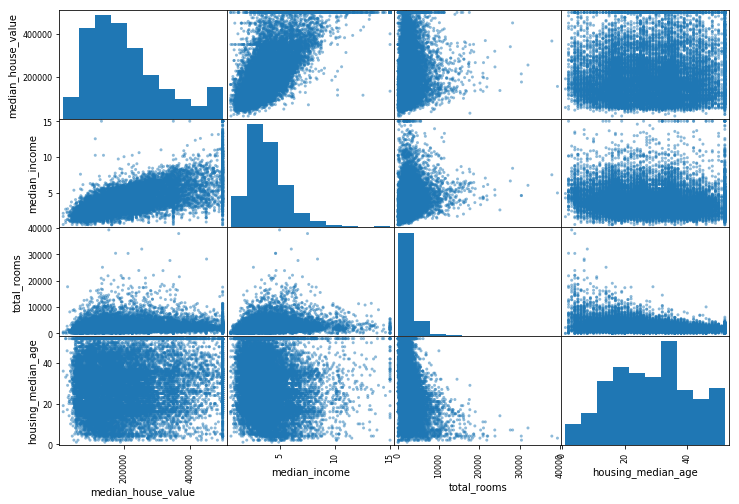

In [28]:
# we can use pandas scatter_matrix function to find correlation between attributes. 
#Since we have 11 attributes so we get 11*11 = 121 graphs which cannot fit on a page so we only consider the main attributes

from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.scatter_matrix(housing[attributes], figsize = (12,8))

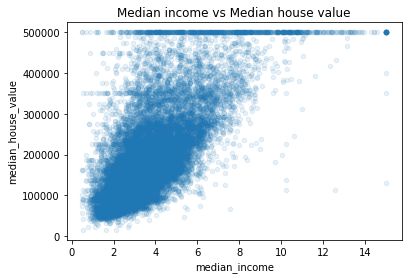

In [29]:
# The most promising attribute to predict the median house value is the median income so let's zoom in on their corrleation 

housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, 
             title = "Median income vs Median house value")

# Experimenting with Attribute Combinations

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [31]:
# Let's create some good attributes to our data

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [32]:
# Now let's look at the correlation matrix again

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

1. Rooms per household is more informative attribute than total rooms. Obviously the bigger the house the more expensive it is
2. This is an iterative process. You can analyze its output to gain more insights and come back to this exploration step.

# Preparing the Data for Machine Learning Algorithms

It's time to prepare data for machine learning algorithms instead of doing it manually, we should write functions to do that,
    for several good reasons-
- This will allow you to reproduce these transformations easily on any dataset(eg.next time you get a fresh dataset)
- We will gradually build a library of transformation fuctions so that we can reuse in future projects
- We can use these functions in our live system to transform the new data before feeding it to our algorithm
- Easily try various transformations and see which combination of transfomation works best

In [33]:
# First let's revert to a clean training set. let's seperate predictors and target because we don't want to apply the same 
# transfomation to the predictors and target values(note that drop()creates copy of the data and does not affect strat_train_set)

housing  =  strat_train_set.drop("median_house_value", axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

Most machine learning algorithms cannot work with missing features, so let's create a new function to take care of them

We have three options for them
1. Get rid of the corresponding districts
2. Get rid of the whole attribute
3. Set the values to some value(zero, the mean, the median, etc.)

In [34]:
housing.dropna(subset = ["total_bedrooms"])  # option 1
housing.drop("total_bedrooms", axis =1)     # option 2
median  =  housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace = True)

In [35]:
# Scikit learn provides a handy class to take care of missing values: Imputer here how to use it

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

# Since the median can only be implemented on numeric data. we need to create a copy of the data without the text attribute
housing_num = housing.drop("ocean_proximity", axis = 1)

# Now we can fit imputer instance to the training data using fit() method
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [36]:
# Imputer has simply compute the median of each attribute
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
# checking 
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
# now we can use this trained imputer to transform the training set by replacing missing values by learned medians
X = imputer.transform(housing_num)

#The result is a plain Numpy array containing the transformed features.
#Put it back in pandas frame
housing_tr  = pd.DataFrame(X, columns = housing_num.columns)

# Handling Text and Categorical Attributes

In [39]:
# We leftout ocean_proximity because it is a text attribute so we cannot compute its median
# Scikit learn provides a transformer for this task called LabelEncoder:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [40]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [41]:
# One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two 
# distant values and obviously this is not the case for our data. So scikit learn provides One-Hot encoding which provides one 
# binary attribute per category.

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
# if you want to convert sparse matrix to an array then just call the toarray() method:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [43]:
# we can apply both transformations(from text categories to integer categories, then from integer categories to one-hot vectors)
# in one shot using LabelBinarizer class:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# Custom Transformers

In [44]:
# if we add TransformerMixin and BaseEstimator as a base class(and avoid *arg and **kargs in our constructor)
# We will get two extra methods(get_params() and set_params()) that will be used for automatic hyperparameter tuning
# for example
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):  # no *arg or *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self   # nothing else to do
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix]/ X[:, household_ix]
        population_per_household = X[:, population_ix]/ X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Transformer has one parameter, add_bedrooms_per_room set to True by default. This parameter will allow us to easily find out 
weather adding this attribute is helps the machine learning algorithm or not. More generally we can add any hyperparameter to 
get any data preparation step that we are not 100% sure about.

# Feature Scaling

1. Most important transformations we need to apply to our data is feature scaling.
2. ML algorithms don't perform well when the input numerical attributes have different scales of data.
3. In our data the total number of rooms ranges from about 6 to 39,320 while the median income only range from 0 to 15.
4. Scaling the target values is generally not required.

 There is two common ways to get all attributes to have the same scale: min-max scaling and standardization. 

1. Min max scaling (or normalization) - values are shifted and rescaled so that they end up ranging from 0 to 1. 
We do this by subtracting the min value and dividing by max minus the min
Scikit learn provides a transformer called MinMaxScaler it has a feature_range hyperparameter that let's us change the range if
we don't want 0-1 for some reason.


2.
Standardization is different - first it subtracts mean value(standardized always have a zero mean), and then it divides 
by the variance so that the resulting distribution has unit variance.
standardization is much less affected by outliers

important point - All the tranformations, it is important to fit the scalers to the trainig data only, not to the full dataset
only then you can use them to transform the training set and test set(and new data)

# Transformation pipelines

In [45]:
# Scikit learn provides the pipeline class to help with such sequences of transformations in right order.
# Here is example

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([("imputer", Imputer(strategy = "median")), ("attribs_adder", CombinedAttributesAdder()),
                        ("std_scaler", StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [46]:
# it would be nice if we could feed a pandas dataframe directly into our pipeline instead of having to first manually extract
# the numerical columns into Numpy array. There is nothing in sklearn to handle pandas datdframes but we can write a custom
# transformer for this task

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y  = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [47]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)), ('imputer', Imputer(strategy = "median")), 
                        ('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler()),
                        ])
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)), ('label_binarizer', MyLabelBinarizer()),])

In [48]:
# we use sklearn FeatureUnion to join these two pipelines. we give it a list of transformers (which can be entire transformer
# pipelines); when it's transform( method is called, it runs each transformer's transform() method in parallel, waits for their 
# ouput and returns the result(and of course calling its fit() method calls each transformer's fit()method)).
# A full pipeline handling both numerical and categorical attributes may look like this:

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline),])

In [49]:
# we can run whole pipeline simply:
housing_prepared  = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [50]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

In [51]:
#Let's first train linear regression model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:", lin_reg.predict(some_data_prepared))
print("labels:", list(some_labels))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [53]:
# let's check regression model RMSE on whole training set using Scikit-learn's mean_squared_error

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [54]:
# Most of our median_housing_values range between 12000 to 265000. So a typical prediction error of 68628 is not satisgying
# It means our model is underfitting the training data
# so let's train different model DecisionTreeRegressor it is powerful model, capable of finding complex nonlinear relationship
# in the data

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
housing_predictions= tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

Model has badly overfit the data. We need to use part of the training set for training and part for model evaluation.

# Better Evaluation Using Cross-Validation

In [56]:
# 1 way to evaluate is to use train_test_split function to split the data into training and testing
# A great alternative is to use Scikit-Learn's cross validation feature. The following code performs K-fold cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [57]:
# let's look at the results
def display_scores(scores):
    print("scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [58]:
display_scores(tree_rmse_scores)

scores:  [68708.96684373 64482.86704371 71293.11072001 70024.67741475
 72325.13264025 74294.39052769 70851.95385044 69740.10195195
 76064.29170592 70446.15501354]
Mean:  70823.16477119799
Standard deviation:  2976.8835536494034


In [59]:
# same scores for linearn regression model just to be sure

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(- lin_scores)
display_scores(lin_rmse_scores)

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.6740017983484


In [60]:
# let's use RandomForestRegressor to check learning of the model

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores:  [52261.35008839 50536.75702919 52873.19700691 55146.97445875
 51402.65410452 56352.19559199 51051.95156205 50477.86941199
 55368.12412459 52977.5501892 ]
Mean:  52844.862356757905
Standard deviation:  2013.736615027726


# Fine Tune Your Model

1. Grid Search

In [61]:
# 1 way to do that would be to fiddle with hyperparameter manually, until we find a great combination of hyperparameters values
# another we should use sklearn GridSearchCV search for us.let's check

from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3,10,30], 'max_features':[2,4,6,8], 'bootstrap': [False], 'n_estimators':[3,10],
              'max_features': [2,3,4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [62]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

If GridSearchCV is initialized with refit =True (which is the default), then once it finds the best estimator using cross 
validation, it retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance

In [64]:
# evaluation scores are also available

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score), params)

61942.09161842481 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53802.851758365905 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59611.47599912603 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52798.58221415106 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58994.19383102404 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51492.14929597968 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


The grid search approach is fine when you are exploring relatively few combinations but when hyperparameter search space is 
large, it is often preferable to use RandomizedSearchCV instead.
this approach has two main benefits- 
1. if you let the randomized search run for, say 1000 iterations, this approach will explore 1000 different values for each
   hyperparameter.
2. more control over the computing budget.

## Analyze the Best Models and Their Errors

In [65]:
# relative importance of each attribute for making accurate predictions

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.19008365e-02, 6.83785153e-02, 4.32863836e-02, 2.03478493e-02,
       1.88361388e-02, 2.24925224e-02, 1.99958857e-02, 3.26134167e-01,
       8.99333761e-02, 1.01205544e-01, 5.49888801e-02, 2.12357891e-02,
       1.05752343e-01, 7.23901969e-05, 6.42681412e-03, 9.01256509e-03])

In [66]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)


[(0.3261341671700305, 'median_income'),
 (0.10575234261038886, 'INLAND'),
 (0.10120554389557194, 'pop_per_hhold'),
 (0.09190083646936886, 'longitude'),
 (0.08993337609090767, 'rooms_per_hhold'),
 (0.06837851532650006, 'latitude'),
 (0.054988880134004395, 'bedrooms_per_room'),
 (0.043286383578564, 'housing_median_age'),
 (0.022492522358871128, 'population'),
 (0.021235789144655813, '<1H OCEAN'),
 (0.020347849292018865, 'total_rooms'),
 (0.019995885679779533, 'households'),
 (0.01883613884671673, 'total_bedrooms'),
 (0.009012565086673838, 'NEAR OCEAN'),
 (0.006426814119047881, 'NEAR BAY'),
 (7.239019689988632e-05, 'ISLAND')]

# Evaluate Your System on the Test Set

In [67]:
# Evaluate final model on test set

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

display_scores(final_rmse)

scores:  49872.89354147761
Mean:  49872.89354147761
Standard deviation:  0.0


                                       THANK YOU